In [26]:
import os
import numpy as np

# 设置数据读取路径
summary_data_savepath = "D:\Document\项目\wind\components_Summary\DASHlink_full_fourclass_raw_comp.npz"

# 读取数据
summary_data = np.load(summary_data_savepath)
summary_data_array = summary_data['data']
summary_data_label = summary_data['label']

# 载入变量名称
summary_data_varname_list = ['Aileron Position Left', 'Aileron Position Right', 'Corrected Angle of Attack', 'Baro Correct Altitude',\
    'Computed Airspeed', 'Selected Course', 'Drift Angle', 'Elevator Position', 'True Flap Position', 'Glideslope Deviation',\
        'Selected Heading', 'Localizer Deviation', 'Core Speed Avg', 'Total Pressure', 'Pitch Angle', 'Roll Angle', 'Rudder Position',\
            'True Heading', 'Vertical Acceleration', 'Wind Speed']

In [35]:
# 进行pca分析
from sklearn.decomposition import PCA

# 创建一个PCA对象并指定要保留的主成分数量
n_components=20
pca = PCA(n_components)

# 对数据集进行PCA
summary_data_pca = pca.fit_transform(summary_data_array[0])

# 获取主成分的方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_
print("解释方差比例：", explained_variance_ratio, "  ----- 总计：", sum(explained_variance_ratio))

# 获取主成分的特征向量
components = pca.components_
print("主成分特征向量：", components)


解释方差比例： [9.10589440e-01 8.91003335e-02 1.17186823e-04 9.85688409e-05
 5.12268785e-05 1.54839712e-05 7.86011628e-06 6.13143448e-06
 4.71515241e-06 3.06574066e-06 2.07493866e-06 1.72440278e-06
 1.36402612e-06 5.08447239e-07 2.18229301e-07 9.52780205e-08
 1.98542859e-09 2.43996421e-11 6.48725195e-34 6.60883533e-39]   ----- 总计： 1.0
主成分特征向量： [[ 2.46939114e-04 -7.33347355e-04 -3.45509937e-03  9.71086661e-01
   1.59004132e-02 -4.03932006e-28  1.21769897e-04 -1.34830857e-03
  -2.36379489e-01  2.79228158e-06 -3.52315665e-32  5.78181384e-06
  -9.06551898e-03 -2.75908746e-02 -2.06231283e-03  1.42040482e-04
   1.20528771e-04 -3.67449439e-06  1.07890474e-04 -7.09186098e-04]
 [-1.46663062e-03  1.10538924e-03  3.60836353e-03 -2.36272994e-01
   2.90735311e-02  8.27180617e-25 -1.28488409e-04  3.85131207e-04
  -9.70909579e-01  8.44521468e-06  3.93793470e-33  6.72532530e-06
  -1.19703346e-02  2.23807781e-02  3.71043315e-04  1.61716256e-03
  -8.41416373e-05 -9.13418576e-04 -1.52723821e-04  1.64634795e-04]

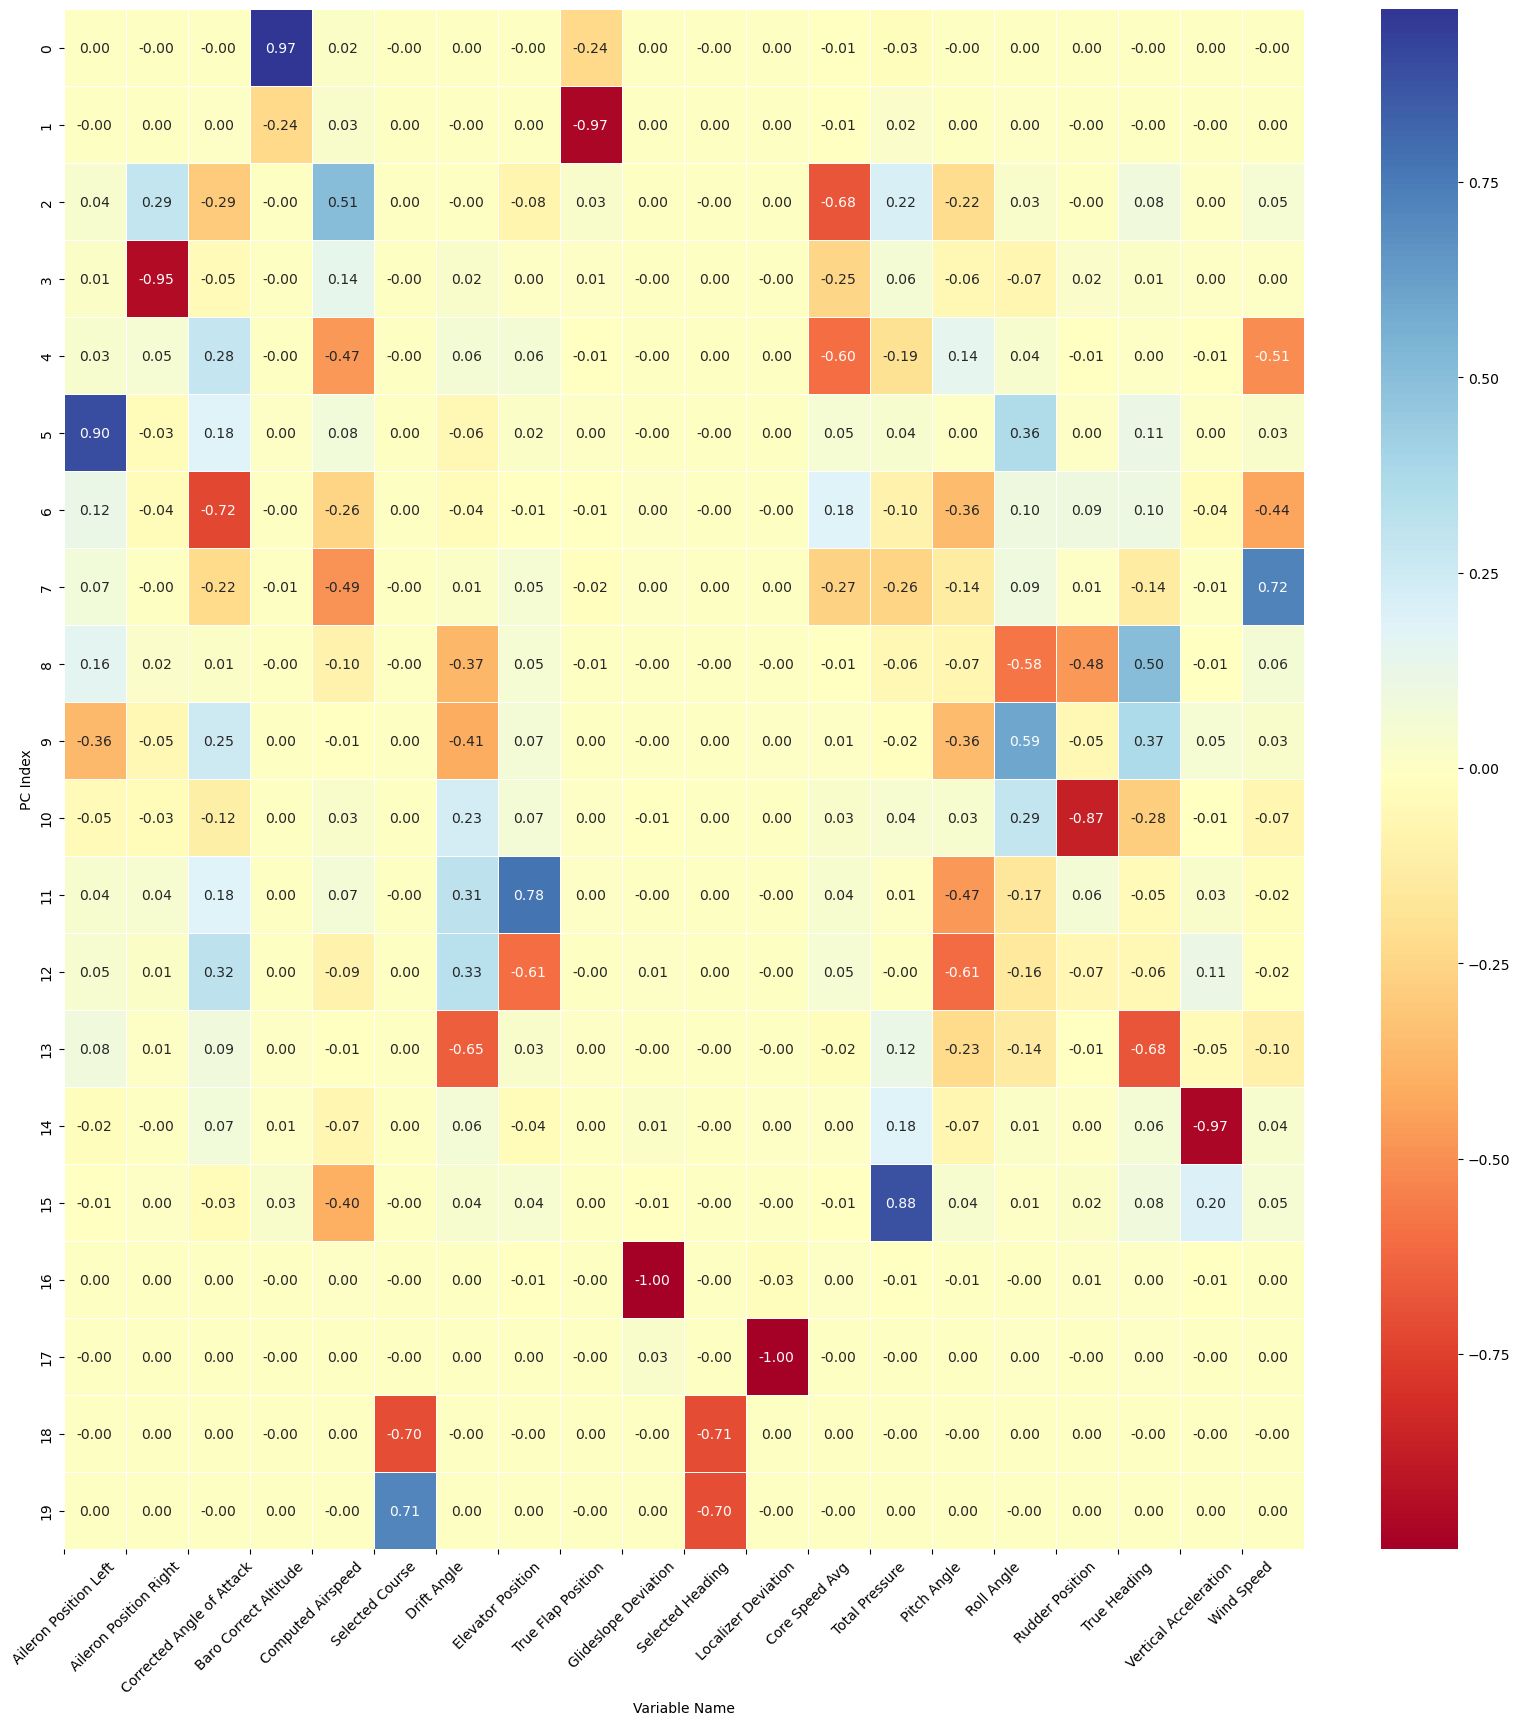

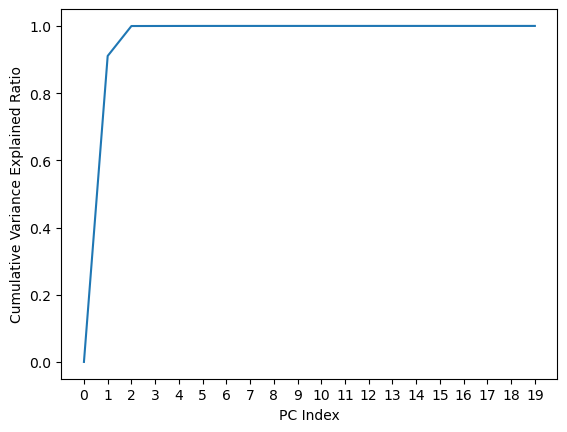

In [50]:

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 创建pca热力图表
plt.figure(figsize=(components.shape[1], components.shape[0]))

# 使用seaborn库绘制热力图
sns.heatmap(components, cmap='RdYlBu', annot=True, fmt = '.2f', linewidths=.5, square=False)

plt.xticks(np.arange(len(summary_data_varname_list)), summary_data_varname_list, rotation=45)
plt.xlabel('Variable Name')
plt.ylabel('PC Index')

# 显示图表
plt.show()

# 创建方差解释性折线图表
plt.figure()
plt.plot([i for i in range(n_components)], [sum(explained_variance_ratio[:i]) for i in range(n_components)])
plt.xticks([i for i in range(n_components)])
plt.xlabel('PC Index')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.show()